In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 4)})

# Семинар - Задача распознавания рукописных цифр

In [4]:
from sklearn.datasets import load_digits

In [5]:
data = load_digits()
print(data['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
X, y = data.data, data.target

In [7]:
X.shape, y.shape

((1797, 64), (1797,))

In [8]:
counts = np.unique(y, return_counts=True)
pd.DataFrame(counts[1], counts[0], columns=['counts'])

,counts
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174
9,180


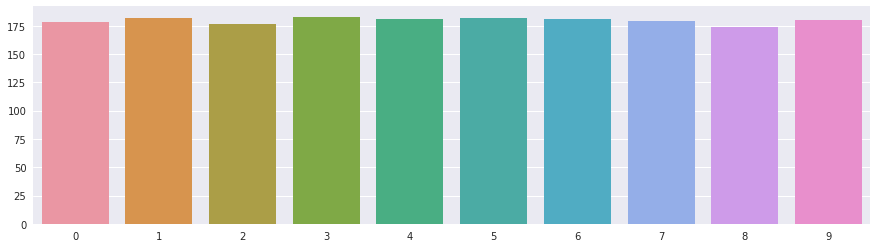

In [9]:
sns.barplot(counts[0], counts[1])
plt.show()

In [10]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Class name:  8
[[ 0.  0.  2. 11. 14. 12.  3.  0.]
 [ 0.  0. 14. 14.  9. 15.  8.  0.]
 [ 0.  5. 12.  0.  5. 15.  2.  0.]
 [ 0.  3. 16. 11. 15.  3.  0.  0.]
 [ 0.  0.  1. 14. 16.  4.  0.  0.]
 [ 0.  0.  0. 15.  5. 15.  0.  0.]
 [ 0.  0.  1. 16. 10. 11.  0.  0.]
 [ 0.  0.  0. 15. 13.  2.  0.  0.]]


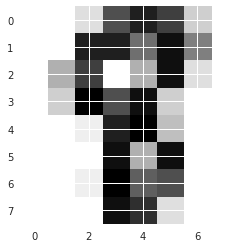

In [11]:
i = np.random.randint(0, X.shape[0])
print('Class name: ',y[i])
print(X[i].reshape(8,8))


plt.imshow(X[i].reshape(8,8), cmap='gray_r')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3, 
                                                    shuffle=True,
                                                   random_state=18)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((1257, 64), (540, 64), (1257,), (540,))

## Метод ближайших соседей

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X_train, y_train)
knn_predictons = knn.predict(X_test)

In [17]:
preds = pd.DataFrame(y_test, columns=['True'])
preds['knn_pred'] = knn_predictons

In [18]:
preds

,True,knn_pred
0,0,0
1,3,3
2,4,4
3,4,4
4,8,8
5,4,4
6,0,0
7,8,8
8,3,3
9,7,7


In [19]:
# Посмотрим долю правильных ответов:
preds[preds['True'] == preds['knn_pred']].shape[0]/preds.shape[0]

0.9888888888888889

In [20]:
#Тоже самое средставми sklearn:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_predictons)

0.9888888888888889

In [21]:
acc_vect = []
for i in range(100):
    knn = KNeighborsClassifier(n_neighbors=i+1, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_predictons = knn.predict(X_test)
    acc_vect = np.append(acc_vect, accuracy_score(y_test, knn_predictons))

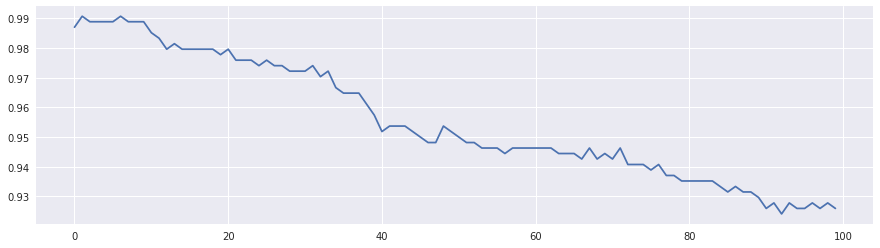

In [22]:
plt.plot(acc_vect)
plt.show()

<center>
<h4>
Поговорим подобробнее о Валидации на Лекции </h4></center>

## Рашающее дерево

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree = DecisionTreeClassifier()

In [25]:
tree.fit(X_train, y_train)
tree_predictons = tree.predict(X_test)
preds['tree_pred'] = tree_predictons
preds.head()

,True,knn_pred,tree_pred
0,0,0,0
1,3,3,3
2,4,4,4
3,4,4,4
4,8,8,8


In [26]:
accuracy_score(y_test, tree_predictons)

0.8537037037037037

In [27]:
tree = DecisionTreeClassifier() # random_state=18
tree.fit(X_train, y_train)
tree_predictons = tree.predict(X_test)
accuracy_score(y_test, tree_predictons)

0.8592592592592593

In [28]:
tree = DecisionTreeClassifier(criterion="entropy", random_state=18)
tree.fit(X_train, y_train)
tree_predictons = tree.predict(X_test)
accuracy_score(y_test, tree_predictons)

0.8425925925925926

In [29]:
tree = DecisionTreeClassifier(criterion="gini", random_state=18)
tree.fit(X_train, y_train)
tree_predictons = tree.predict(X_test)
accuracy_score(y_test, tree_predictons)

0.8611111111111112

In [30]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=10,  min_samples_leaf=10, random_state=18)
tree.fit(X_train, y_train)
tree_predictons = tree.predict(X_test)
accuracy_score(y_test, tree_predictons)

0.812962962962963

In [31]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

## Кросвалидация

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cvs = cross_val_score(tree, X_train, y_train, scoring='accuracy', cv=5)
cvs, np.mean(cvs)

(array([0.8515625 , 0.81176471, 0.768     , 0.79518072, 0.74089069]),
 0.7934797234066057)

## Поиск оптимальных параметров по сетке

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=10,  min_samples_leaf=10, random_state=18)
params = { 
    'criterion':['gini', 'entropy'],
    'max_depth': range(1, 50),
    'min_samples_leaf': range(1,50)
         }

gcv = GridSearchCV(tree, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy')
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=18,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 50), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
gcv.best_score_

0.8456642800318218

In [37]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1}

In [38]:
accuracy_score(y_test, gcv.predict(X_test))

0.8555555555555555

In [39]:
tree_preds = pd.DataFrame(gcv.predict(X_test), columns=['tree'])


In [40]:
tree_preds['true'] = y_test

# : 368 True:  2 Predictions:  4


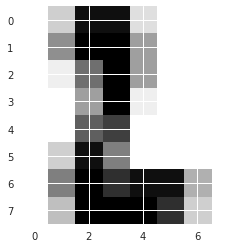

In [41]:
n = tree_preds[tree_preds['true'] != tree_preds['tree']].shape[0]
confused = tree_preds[tree_preds['true'] != tree_preds['tree']].index[np.random.randint(0,n)]
example = X_test[confused].reshape(8,8)
print("# :", confused, 
      "True: ", tree_preds.iloc[confused]['true'],
      "Predictions: ",tree_preds.iloc[confused]['tree'])
plt.imshow(example, cmap='gray_r')
plt.show()

In [42]:
conf = tree_preds[tree_preds['true'] != tree_preds['tree']]
conf['val'] = 1

In [43]:
conf_pivot = pd.pivot_table(conf, index=['true'], values='val', columns=['tree'], aggfunc='count').fillna(0)

In [44]:
sum_co = conf_pivot.sum(axis=1)

In [45]:
conf_pivot

tree,0,1,2,3,4,5,6,7,8,9
true,,,,,,,,,,
1,0.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,4.0,0.0
2,1.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,3.0,0.0
3,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0
4,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0
6,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0
8,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0
9,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0
